We start our program with these initial commands and we read the data.

In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data_filename = '515364771_T_ONTIME_REPORTING.csv'
data = pd.read_csv(data_filename)

# Question 1

We create a Data Frame which depicts the number of flights that have taken place in every airport. We count as airport every ORIGIN of our data. We can see that flights have departed from 358 different airports, according to our results.

In [3]:
new = pd.DataFrame()
new['num_of_flights'] = data['ORIGIN'].value_counts()
new.count()

num_of_flights    358
dtype: int64

For example, in airport ATL the number of flights is 390.046. 

In [4]:
new.head(1)

,num_of_flights
ATL,390046


We add a new column which shows the total number of delays at these airports. 
We find them by filtering the initial data given in order to count them by keeping only the positive values of delays. If the DEP_DELAY value is 0.0 we suppose that the airplane has departed on time. 
If the DEP_DELAY is negative we suppose that the airplane has departed earlier (because, for example, all its passengers were on the airplane). 

In [5]:
new['num_of_delays'] = data['ORIGIN'].loc[data.DEP_DELAY > 0.0].value_counts()
new.head(3)

,num_of_flights,num_of_delays
ATL,390046,141182
ORD,332953,112855
DFW,279298,100994


We update our Data Frame by removing the outliers, the top 1% of the airports with the lowest number of flights. Therefore, the number of airports is 358 - 1% * 358 = 354 

In [6]:
new = new.loc[new.num_of_flights >= new.num_of_flights.quantile(0.01)]
new.count()

num_of_flights    354
num_of_delays     354
dtype: int64

Finally, we create our misery index by the information gathered and we sort the airports based on the delay probability. For finding the delay probability we divide the number of delayed flights with the total number of flights.

In [9]:
misery = pd.DataFrame()
misery['Delay Probability'] = new.num_of_delays/new.num_of_flights
misery.index.name='Airport'#We set this index name to make the information shown clearer
misery = misery.sort_values(by = 'Delay Probability', ascending = False)
misery

,Delay Probability
Airport,
OGD,0.658730
SCK,0.650602
MDW,0.587072
HYA,0.584270
DAL,0.571082
HOU,0.543524
OWB,0.504505
HGR,0.492754
HTS,0.481229


We find the average (mean) and median delay of each airport. We do not exclude the negative values as we
suppose that we are interested to find the general average and median time of every airports' departures compared to the scheduled time. We find them by not taking into account the excluded outliers.

In [13]:
airport_delays = pd.DataFrame(index = misery.index)
airport_delays['Average Delay'] = data.groupby('ORIGIN').DEP_DELAY.mean()
airport_delays['Median Delay'] = data.groupby('ORIGIN').DEP_DELAY.median()
airport_delays.head(4)

,Average Delay,Median Delay
Airport,,
OGD,19.064000,5.0
SCK,24.265857,8.0
MDW,14.818530,4.0
HYA,34.397727,3.5


We sort the results based on the average delay.

In [15]:
airport_delays = airport_delays.sort_values(by = 'Average Delay', ascending = False)
airport_delays

,Average Delay,Median Delay
Airport,,
PPG,45.385246,0.0
HYA,34.397727,3.5
MMH,33.503704,-1.0
OTH,29.173184,-2.0
OWB,27.635514,3.0
HGR,26.760870,0.0
LWB,25.709220,-5.0
TTN,25.308151,0.0
SCK,24.265857,8.0


We sort the results based on median delay.

In [16]:
airport_delays = airport_delays.sort_values(by = 'Median Delay', ascending = False)
airport_delays

,Average Delay,Median Delay
Airport,,
SCK,24.265857,8.0
OGD,19.064000,5.0
MDW,14.818530,4.0
HYA,34.397727,3.5
DAL,14.257589,3.0
OWB,27.635514,3.0
HOU,12.946117,2.0
HTS,18.103203,1.0
BLV,21.368942,0.0


We enrich the initial misery index with these new information. For this reason, we join the two Data Frames and we sort the values based on the delay probability. 

In [17]:
final_misery = misery.merge(airport_delays, left_index=True, right_index=True, how = 'outer')
final_misery = final_misery.sort_values(by = 'Delay Probability', ascending = False)
final_misery

,Delay Probability,Average Delay,Median Delay
Airport,,,
OGD,0.658730,19.064000,5.0
SCK,0.650602,24.265857,8.0
MDW,0.587072,14.818530,4.0
HYA,0.584270,34.397727,3.5
DAL,0.571082,14.257589,3.0
HOU,0.543524,12.946117,2.0
OWB,0.504505,27.635514,3.0
HGR,0.492754,26.760870,0.0
HTS,0.481229,18.103203,1.0


# Question 2

We read the new file with the airline names.

In [19]:
airline_file = 'L_UNIQUE_CARRIERS.csv_'
airline_data = pd.read_csv(airline_file)

We count the number of flights of each airline.

In [24]:
new_q2 = pd.DataFrame()
new_q2['Flights'] = data['CARRIER'].value_counts()
new_q2.head(3)

,Flights
WN,1352552
DL,949283
AA,916818


We count the number of delays of each airline. We suppose, as in question 1, that a delay has occured when DEP_DELAY value is greater than 0.0.

In [25]:
new_q2['num of delays'] = data['CARRIER'].loc[data.DEP_DELAY > 0.0].value_counts()
new_q2.head(3)

,Flights,num of delays
WN,1352552,662363
DL,949283,286165
AA,916818,317751


Finally, we create our misery index by the information gathered and we sort the airlines based on the delay probability.

In [51]:
misery2 = pd.DataFrame()
misery2['Delay Probability'] = new_q2['num of delays']/new_q2['Flights']
misery2.index.name='Code'#We set index name as 'Code'
misery2 = misery2.sort_values(by = 'Delay Probability', ascending = False)
misery2.head(4)

,Delay Probability
Code,
WN,0.489714
F9,0.444212
B6,0.409859
OH,0.360009


We add the name of the airline as a column.

In [53]:
misery2 = misery2.reset_index().merge(airline_data, how="left").set_index(['Code'])
#We join the Data Frames like this so that we can keep the desired index
misery2 = misery2[['Description', 'Delay Probability']]
#We change the order of columns so that it' s more logical
misery2

,Description,Delay Probability
Code,,
WN,Southwest Airlines Co.,0.489714
F9,Frontier Airlines Inc.,0.444212
B6,JetBlue Airways,0.409859
OH,PSA Airlines Inc.,0.360009
AA,American Airlines Inc.,0.346580
G4,Allegiant Air,0.341776
VX,Virgin America,0.304584
DL,Delta Air Lines Inc.,0.301454
UA,United Air Lines Inc.,0.298036


We find the average (mean) and median delay of each airline. We make the same suppositions as to question 1.

In [83]:
airline_delays = pd.DataFrame(index = misery2.index)
airline_delays['Average Delay'] = data.groupby('CARRIER').DEP_DELAY.mean()
airline_delays['Median Delay'] = data.groupby('CARRIER').DEP_DELAY.median()
airline_delays = airline_delays.sort_values(by = 'Average Delay', ascending = False)
airline_delays.head(3)

,Average Delay,Median Delay
Code,,
F9,19.684102,-1.0
B6,15.869267,-2.0
G4,12.922575,-2.0


We add the name of the airline as a column.

In [84]:
airline_delays = airline_delays.reset_index().merge(airline_data, how="left").set_index(['Code'])
#We join the Data Frames like this so that we can keep the desired index
airline_delays = airline_delays[['Description', 'Average Delay', 'Median Delay']]
#We change the order of columns so that it' s more logical
airline_delays

,Description,Average Delay,Median Delay
Code,,,
F9,Frontier Airlines Inc.,19.684102,-1.0
B6,JetBlue Airways,15.869267,-2.0
G4,Allegiant Air,12.922575,-2.0
EV,ExpressJet Airlines LLC,12.319338,-4.0
OH,PSA Airlines Inc.,12.038332,-2.0
YV,Mesa Airlines Inc.,11.226541,-3.0
WN,Southwest Airlines Co.,11.138968,0.0
9E,Endeavor Air Inc.,10.732733,-4.0
OO,SkyWest Airlines Inc.,10.112660,-4.0


We enrich the initial misery index with these new information. For this reason, we join the two Data Frames.

In [70]:
final_misery2 = misery2.reset_index().merge(airline_delays, on = 'Description', how="outer").set_index(['Code'])
#We join the Data Frames like this so that we can keep the desired index
final_misery2 = final_misery2.sort_values(by = 'Delay Probability', ascending = False)
final_misery2 = final_misery2[['Description','Delay Probability', 'Average Delay', 'Median Delay']]
#We change the order of columns again so that it' s more logical
final_misery2

,Description,Delay Probability,Average Delay,Median Delay
Code,,,,
WN,Southwest Airlines Co.,0.489714,11.138968,0.0
F9,Frontier Airlines Inc.,0.444212,19.684102,-1.0
B6,JetBlue Airways,0.409859,15.869267,-2.0
OH,PSA Airlines Inc.,0.360009,12.038332,-2.0
AA,American Airlines Inc.,0.346580,10.078218,-2.0
G4,Allegiant Air,0.341776,12.922575,-2.0
VX,Virgin America,0.304584,6.333836,-4.0
DL,Delta Air Lines Inc.,0.301454,7.461923,-2.0
UA,United Air Lines Inc.,0.298036,10.060413,-3.0


# Question 3

In the displayed histogram, y axis shows the number of airports and x axis shows the number of flights. We set the number of bins to be 300.

Text(0, 0.5, 'airports')

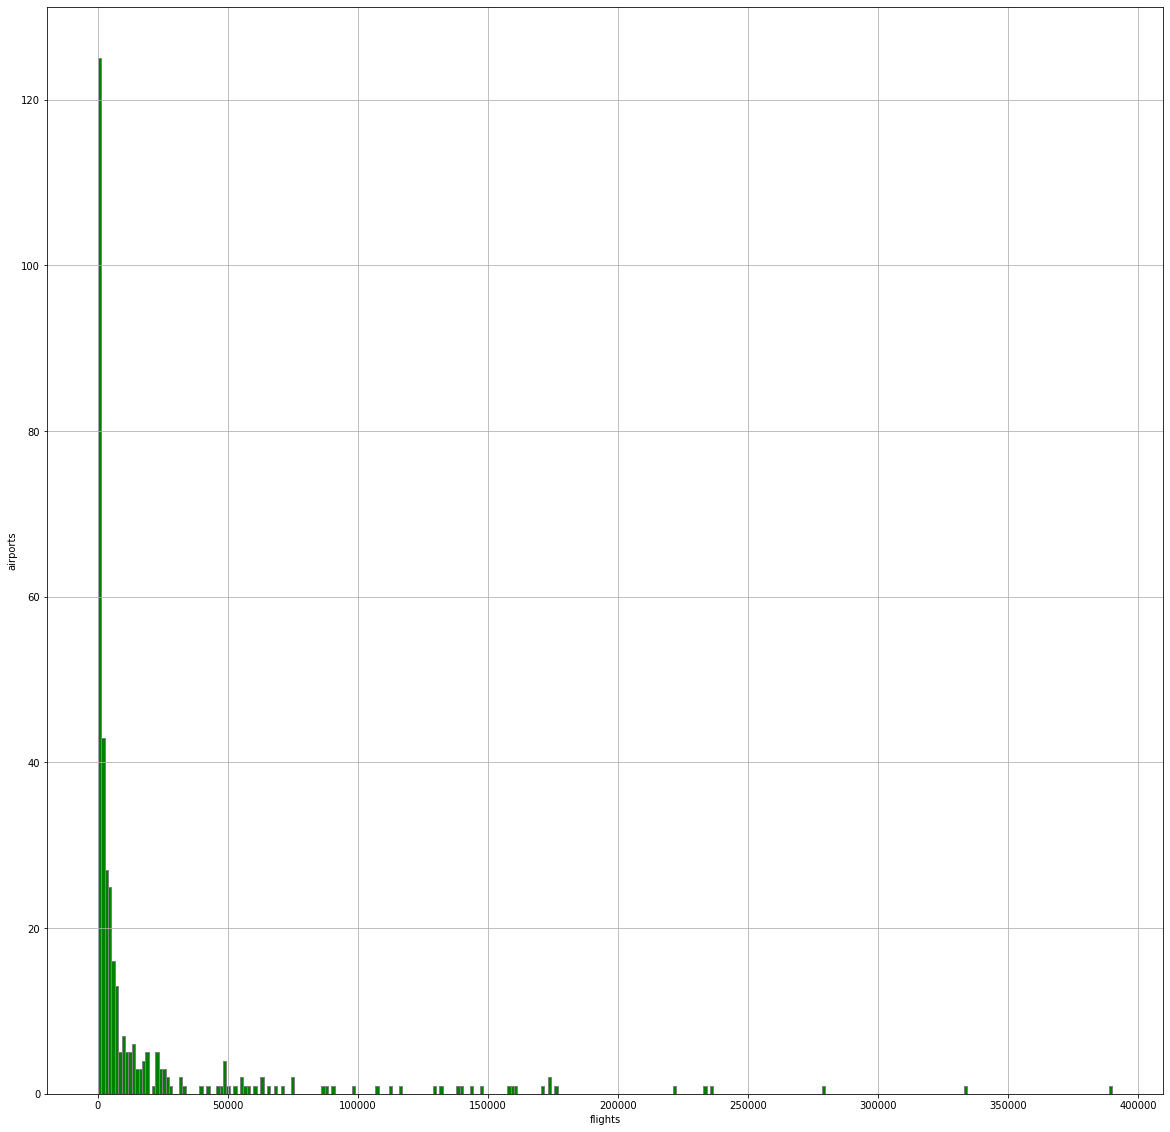

In [71]:
q3 = pd.DataFrame()
q3 = data['ORIGIN'].value_counts()#We define the input of the histogram creator method.
hist = q3.hist(bins = 300, color='green', edgecolor='gray', alpha=1.0, figsize=(20, 20))
hist.set_xlabel('flights')
hist.set_ylabel('airports')

# Question 4

We set datetime type for FL_DATE column values. To do that we create a new dataframe, new_data, so that we do not change the given data. Then, we group them based on the month of these values in monthly Data Frame.

In [72]:
new_data = pd.DataFrame(data)
new_data['FL_DATE'] = pd.to_datetime(new_data['FL_DATE'])
monthly = new_data.groupby(new_data.FL_DATE.dt.month)

We do the same but only for the flights that have a delay.

In [73]:
delay_data = pd.DataFrame(new_data.loc[new_data.DEP_DELAY > 0.0])
monthly_d = delay_data.groupby(delay_data.FL_DATE.dt.month)

We define the y and x axes of the plot.

In [74]:
y = monthly.size()
y_d = monthly_d.size()
x = monthly.FL_DATE.first()
#we do not find x_d for the delayed values as the months are common

We create a dictionary for the data and we make a data frame from it. The dictionary is an easy manner to depict the name desired for every line. Our plot is based on this data frame.

Text(0, 0.5, 'Flights')

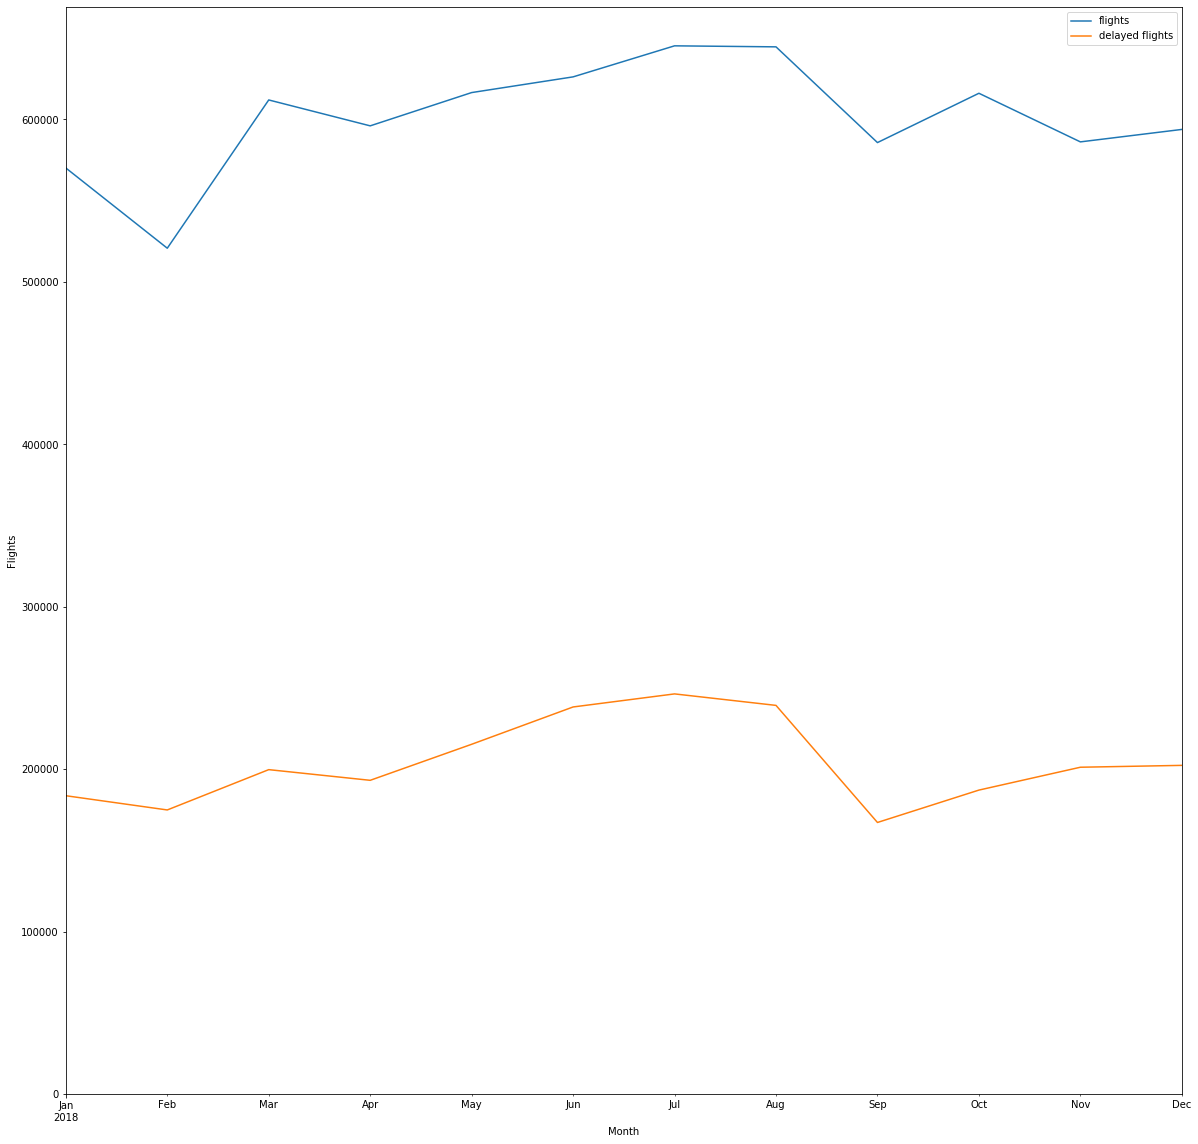

In [75]:
pd.DataFrame({'flights':y.values, 'delayed flights':y_d.values}, index = x).plot(figsize=(20, 20))
# We use the indices of x and x_d and the values of y and y_d
plt.ylim(0) # Set the lower y value to 0
plt.xlabel('Month') # Label of the x axis
plt.ylabel('Flights') # Label of the y axis

# Question 5

We create a table that contains the mean delay of each airline and of every possible combination of origin and destination.

In [76]:
table = pd.pivot_table(data, values = 'DEP_DELAY', columns = ['CARRIER'], 
                       index = ['ORIGIN', 'DEST'], aggfunc = 'mean')
table.head(3)

CARRIER             9E  AA  AS  B6        DL         EV  F9  G4  HA  MQ  NK  \
ORIGIN DEST                                                                   
ABE    ATL   11.991379 NaN NaN NaN  7.530387  10.433735 NaN NaN NaN NaN NaN   
       CLT         NaN NaN NaN NaN       NaN        NaN NaN NaN NaN NaN NaN   
       DTW         NaN NaN NaN NaN       NaN        NaN NaN NaN NaN NaN NaN   

CARRIER            OH         OO  UA  VX  WN  YV  YX  
ORIGIN DEST                                           
ABE    ATL        NaN        NaN NaN NaN NaN NaN NaN  
       CLT   5.063527        NaN NaN NaN NaN NaN NaN  
       DTW        NaN  15.946507 NaN NaN NaN NaN NaN

From the above table, we find the airline with the minimun time of delay of each possible combination and we create a new Data Frame with these airlines as the data of the Data Frame.

In [85]:
new_table = pd.DataFrame(table.idxmin(1), columns=['Code'])
#We find the minimum value of each row and we add its column name as value to the new Data Frame 
new_table.index.names = ['Origin', 'Destination']
new_table.head(3)

Code
Origin Destination     
ABE    ATL           DL
       CLT           OH
       DTW           OO

We join the new data frame and the airline information to show the airline name too. reset_index() and set_index() helps us maintain the initial indexes we set. 

In [78]:
new_table = new_table.reset_index().merge(airline_data, how="left").set_index(['Origin', 'Destination'])
new_table.sort_values(by = 'Origin')

Code              Description
Origin Destination                              
ABE    ATL           DL     Delta Air Lines Inc.
       CLT           OH        PSA Airlines Inc.
       DTW           OO    SkyWest Airlines Inc.
       FLL           G4            Allegiant Air
       MDT           OO    SkyWest Airlines Inc.
       MYR           G4            Allegiant Air
       ORD           OO    SkyWest Airlines Inc.
       PGD           G4            Allegiant Air
       PHL           OH        PSA Airlines Inc.
       PIE           G4            Allegiant Air
       SFB           G4            Allegiant Air
ABI    DFW           MQ                Envoy Air
ABQ    SNA           WN   Southwest Airlines Co.
       SLC           DL     Delta Air Lines Inc.
       SJC           WN   Southwest Airlines Co.
       SFO           UA    United Air Lines Inc.
       SEA           AS     Alaska Airlines Inc.
       SAT           F9   Frontier Airlines Inc.
       SAN           WN   Southwest Airlines Co.
       PHX           OO    SkyWest Airlines Inc.
       PDX           WN   Southwest Airlines Co.
       ORD           YX         Republic Airline
       OAK           WN   Southwest Airlines Co.
       MSP           DL     Delta Air Lines Inc.
       MDW           WN   Southwest Airlines Co.
       ATL           DL     Delta Air Lines Inc.
       MCO           F9   Frontier Airlines Inc.
       BWI           WN   Southwest Airlines Co.
       DAL           WN   Southwest Airlines Co.
       DEN           OO    SkyWest Airlines Inc.
...                 ...                      ...
VPS    CVG           G4            Allegiant Air
       DCA           YX         Republic Airline
       DFW           MQ                Envoy Air
       EVV           G4            Allegiant Air
       CLE           G4            Allegiant Air
WRG    KTN           AS     Alaska Airlines Inc.
       PSG           AS     Alaska Airlines Inc.
WYS    SLC           OO    SkyWest Airlines Inc.
XNA    TXK           EV  ExpressJet Airlines LLC
       SFO           OO    SkyWest Airlines Inc.
       LGA           YX         Republic Airline
       SFB           G4            Allegiant Air
       ORD           AA   American Airlines Inc.
       MSP           OO    SkyWest Airlines Inc.
       VPS           G4            Allegiant Air
       LAX           G4            Allegiant Air
       CVG           9E        Endeavor Air Inc.
       IAH           OO    SkyWest Airlines Inc.
       EWR           EV  ExpressJet Airlines LLC
       DFW           MQ                Envoy Air
       DEN           YX         Republic Airline
       DCA           YX         Republic Airline
       CLT           OH        PSA Airlines Inc.
       ATL           DL     Delta Air Lines Inc.
       LAS           G4            Allegiant Air
YAK    CDV           AS     Alaska Airlines Inc.
       JNU           AS     Alaska Airlines Inc.
YNG    SFB           G4            Allegiant Air
       PIE           G4            Allegiant Air
YUM    PHX           OO    SkyWest Airlines Inc.

[6361 rows x 2 columns]

We define a function that searches for the best airline based on an origin and a destination given.

In [79]:
def find_best_carrier(table, origin, destination):
    x = table[table.index.get_level_values(0).isin([origin])]
    #We find if the 'origin' parameter given exists in the first column(level) of the indexes
    x = x[x.index.get_level_values(1).isin([destination])]
    #We find if the 'destination' parameter given exists in the second column(level) of the indexes
    if x.empty:
        print('This pair of origin and destination airports doesn\' t exist')
        #combination of origin and destination not found message
    else:    
        print(x)
    return;

This is an example of an existed pair of origin and destination.

In [81]:
find_best_carrier(new_table, 'YAK', 'JNU')

                   Code           Description
Origin Destination                           
YAK    JNU           AS  Alaska Airlines Inc.


This is an example of a non existed pair.

In [82]:
find_best_carrier(new_table, 'YAK', 'PIE')

This pair of origin and destination airports doesn' t exist
